In [1]:
import re
import string
from collections import Counter
from random import randint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from bs4 import BeautifulSoup
import nltk

pd.options.display.max_columns = 30
plt.style.use('seaborn')

In [2]:
# SELECT Id, CreationDate, Body, Title, Tags FROM Posts WHERE PostTypeId = 1
# ORDER BY Rand() ASC OFFSET 0 ROWS FETCH NEXT 50000 ROWS ONLY
df_raw = pd.read_csv('QueryResults_1.csv')
df_raw['CreationDate'] = pd.to_datetime(df_raw['CreationDate'])

In [3]:
df_raw.head()

,Id,CreationDate,Body,Title,Tags
0,36649811,2016-04-15 14:24:48,<p>I'm trying to get in my <code>MyActivity</c...,Error in implementation of interface between a...,<java><android><android-activity><view><interf...
1,36649812,2016-04-15 14:24:58,<p>I tried to change Button in Checkbox by usi...,How to change button's size in checkbox,<android><button><checkbox><size>
2,36649823,2016-04-15 14:25:17,<p>I have a set of points that form a concave ...,Geting sorted edge points from concave polygon,<python><polygon><computational-geometry><dela...
3,36649833,2016-04-15 14:25:46,<p>How to store the value of A1 to A5 to the s...,VBA using loop store value in string,<vba><loops>
4,36649834,2016-04-15 14:25:46,<p>I read about the refactoring storyboards in...,Can I use refactored storyboard in iOS 8?,<ios><swift><ios8><storyboard><uistoryboard>


In [4]:
df_raw.isnull().sum(axis=0)

Id              0
CreationDate    0
Body            0
Title           0
Tags            0
dtype: int64

In [5]:
df = df_raw[['Body', 'Title', 'Tags']]

In [6]:
df.sample(100)

,Body,Title,Tags
23109,<p>I have a textarea in my page. I click on t...,Detect text add in textarea,<javascript><jquery><textarea><add><detect>
39014,<p>I want to choose a random font from my inst...,How to apply a random font to a textbox by scr...,<fonts><indesign><basil.js>
11399,<p>There are some free databases on the intern...,IP location database,<database><ip-geolocation>
19132,"<p>The issue that I am having, is the form wil...",Receiving Action::Template::Error after Submit...,<javascript><ruby-on-rails><ajax><carrierwave>...
2599,<p>I have two tables </p>\n\n<p>structure of t...,SQL query for fetching data from multiple tables,<sql>
41729,<p>What is the Difference between reading and ...,Difference between reading and parsing an xml ...,<c#><xml>
16960,"<p>Im having a problem, the code inside $ionic...",$ionicPlatform.ready not firing,<javascript><angularjs><cordova><ionic-framework>
11066,"<p>Doctrine 1.2.4, PHP 5.3.3<br>\ntables profi...",Issues with FK relations. Doctrine,<php><orm><doctrine><doctrine-1.2>
5919,<p>I have an spreadsheet with one column with ...,Summing names with same values,<google-sheets>
15989,<p>In Chrome you have the debug flag: <code>--...,How do I tell if a transition/transform is 3d ...,<css><firefox><css3><3d><hardware-acceleration>


## Step-by-step

In [12]:
id = randint(0, df.shape[0])
tags = df.Tags.iloc[id]
title = df.Title.iloc[id]
text = df.Body.iloc[id]
print(f"Tags: {tags}")
print(f"Title: {title}")
print(f"Text: {text}")

Tags: <assembly>
Title: Write data to a char using Assembly
Text: <p>I created a program in C to generate a char* processedData.
I send to my assembly program and put it in a register:</p>

<pre><code>mov     edx, [ebp+12]
mov     edi, edx
</code></pre>

<p>How can i write a char into it.
I know i need to
Write a char and inc edi... that in a loop.
But how can i write a char, i already have the value into another register.
But if i do mov edx, 49; char code i'll lose the pointer.
I want to do something like</p>

<pre><code>for(p=malloc(100*sizeof(char*)); p!=NULL;p++){
    *p=//my char code
}
</code></pre>

<p>Assembly for linux (DEBIAN) x86</p>



In [13]:
# Remove code parts (between <code> and </code>) and html tags
bs = BeautifulSoup(text, 'html.parser')
[s.extract() for s in bs('code')]
bs.get_text().lower()

"i created a program in c to generate a char* processeddata.\ni send to my assembly program and put it in a register:\n\nhow can i write a char into it.\ni know i need to\nwrite a char and inc edi... that in a loop.\nbut how can i write a char, i already have the value into another register.\nbut if i do mov edx, 49; char code i'll lose the pointer.\ni want to do something like\n\nassembly for linux (debian) x86\n"

In [14]:
# Remove urls
raw = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', bs.get_text().lower())
raw

"i created a program in c to generate a char* processeddata.\ni send to my assembly program and put it in a register:\n\nhow can i write a char into it.\ni know i need to\nwrite a char and inc edi... that in a loop.\nbut how can i write a char, i already have the value into another register.\nbut if i do mov edx, 49; char code i'll lose the pointer.\ni want to do something like\n\nassembly for linux (debian) x86\n"

In [15]:
# Tokenize
tokens = nltk.word_tokenize(raw)
tokens

['i',
 'created',
 'a',
 'program',
 'in',
 'c',
 'to',
 'generate',
 'a',
 'char*',
 'processeddata',
 '.',
 'i',
 'send',
 'to',
 'my',
 'assembly',
 'program',
 'and',
 'put',
 'it',
 'in',
 'a',
 'register',
 ':',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'into',
 'it',
 '.',
 'i',
 'know',
 'i',
 'need',
 'to',
 'write',
 'a',
 'char',
 'and',
 'inc',
 'edi',
 '...',
 'that',
 'in',
 'a',
 'loop',
 '.',
 'but',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 ',',
 'i',
 'already',
 'have',
 'the',
 'value',
 'into',
 'another',
 'register',
 '.',
 'but',
 'if',
 'i',
 'do',
 'mov',
 'edx',
 ',',
 '49',
 ';',
 'char',
 'code',
 'i',
 "'ll",
 'lose',
 'the',
 'pointer',
 '.',
 'i',
 'want',
 'to',
 'do',
 'something',
 'like',
 'assembly',
 'for',
 'linux',
 '(',
 'debian',
 ')',
 'x86']

In [16]:
# Group particular words that have been split up like C, # -> C#
multiwords_list = [('c', '#')]
tokenizer = nltk.tokenize.MWETokenizer(multiwords_list, separator='')

tokens = tokenizer.tokenize(tokens)
tokens

['i',
 'created',
 'a',
 'program',
 'in',
 'c',
 'to',
 'generate',
 'a',
 'char*',
 'processeddata',
 '.',
 'i',
 'send',
 'to',
 'my',
 'assembly',
 'program',
 'and',
 'put',
 'it',
 'in',
 'a',
 'register',
 ':',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'into',
 'it',
 '.',
 'i',
 'know',
 'i',
 'need',
 'to',
 'write',
 'a',
 'char',
 'and',
 'inc',
 'edi',
 '...',
 'that',
 'in',
 'a',
 'loop',
 '.',
 'but',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 ',',
 'i',
 'already',
 'have',
 'the',
 'value',
 'into',
 'another',
 'register',
 '.',
 'but',
 'if',
 'i',
 'do',
 'mov',
 'edx',
 ',',
 '49',
 ';',
 'char',
 'code',
 'i',
 "'ll",
 'lose',
 'the',
 'pointer',
 '.',
 'i',
 'want',
 'to',
 'do',
 'something',
 'like',
 'assembly',
 'for',
 'linux',
 '(',
 'debian',
 ')',
 'x86']

In [17]:
# Remove punctuation
tokens = [w for w in tokens if w not in string.punctuation]
tokens

['i',
 'created',
 'a',
 'program',
 'in',
 'c',
 'to',
 'generate',
 'a',
 'char*',
 'processeddata',
 'i',
 'send',
 'to',
 'my',
 'assembly',
 'program',
 'and',
 'put',
 'it',
 'in',
 'a',
 'register',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'into',
 'it',
 'i',
 'know',
 'i',
 'need',
 'to',
 'write',
 'a',
 'char',
 'and',
 'inc',
 'edi',
 '...',
 'that',
 'in',
 'a',
 'loop',
 'but',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'i',
 'already',
 'have',
 'the',
 'value',
 'into',
 'another',
 'register',
 'but',
 'if',
 'i',
 'do',
 'mov',
 'edx',
 '49',
 'char',
 'code',
 'i',
 "'ll",
 'lose',
 'the',
 'pointer',
 'i',
 'want',
 'to',
 'do',
 'something',
 'like',
 'assembly',
 'for',
 'linux',
 'debian',
 'x86']

In [20]:
# Remove stopwords
sw = nltk.corpus.stopwords.words('english')
tokens = [w for w in tokens if w not in sw]
tokens

['created',
 'program',
 'c',
 'generate',
 'char*',
 'processeddata',
 'send',
 'assembly',
 'program',
 'put',
 'register',
 'write',
 'char',
 'know',
 'need',
 'write',
 'char',
 'inc',
 'edi',
 '...',
 'loop',
 'write',
 'char',
 'already',
 'value',
 'another',
 'register',
 'mov',
 'edx',
 'char',
 'code',
 "'ll",
 'lose',
 'pointer',
 'want',
 'something',
 'like',
 'assembly',
 'linux',
 'debian',
 'x86']

In [18]:
# Lemmatize
wnl = nltk.stem.WordNetLemmatizer()
tokens = [wnl.lemmatize(w) for w in tokens]
tokens

['i',
 'created',
 'a',
 'program',
 'in',
 'c',
 'to',
 'generate',
 'a',
 'char*',
 'processeddata',
 'i',
 'send',
 'to',
 'my',
 'assembly',
 'program',
 'and',
 'put',
 'it',
 'in',
 'a',
 'register',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'into',
 'it',
 'i',
 'know',
 'i',
 'need',
 'to',
 'write',
 'a',
 'char',
 'and',
 'inc',
 'edi',
 '...',
 'that',
 'in',
 'a',
 'loop',
 'but',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'i',
 'already',
 'have',
 'the',
 'value',
 'into',
 'another',
 'register',
 'but',
 'if',
 'i',
 'do',
 'mov',
 'edx',
 '49',
 'char',
 'code',
 'i',
 "'ll",
 'lose',
 'the',
 'pointer',
 'i',
 'want',
 'to',
 'do',
 'something',
 'like',
 'assembly',
 'for',
 'linux',
 'debian',
 'x86']

In [19]:
# Remove digits
tokens = [w for w in tokens if not w.isdigit()]
tokens

['i',
 'created',
 'a',
 'program',
 'in',
 'c',
 'to',
 'generate',
 'a',
 'char*',
 'processeddata',
 'i',
 'send',
 'to',
 'my',
 'assembly',
 'program',
 'and',
 'put',
 'it',
 'in',
 'a',
 'register',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'into',
 'it',
 'i',
 'know',
 'i',
 'need',
 'to',
 'write',
 'a',
 'char',
 'and',
 'inc',
 'edi',
 '...',
 'that',
 'in',
 'a',
 'loop',
 'but',
 'how',
 'can',
 'i',
 'write',
 'a',
 'char',
 'i',
 'already',
 'have',
 'the',
 'value',
 'into',
 'another',
 'register',
 'but',
 'if',
 'i',
 'do',
 'mov',
 'edx',
 'char',
 'code',
 'i',
 "'ll",
 'lose',
 'the',
 'pointer',
 'i',
 'want',
 'to',
 'do',
 'something',
 'like',
 'assembly',
 'for',
 'linux',
 'debian',
 'x86']

## Custom tokenizer

In [11]:
sw = nltk.corpus.stopwords.words('english')

def custom_tokenizer(text):
    # Remove <code> tags
    bs = BeautifulSoup(text, 'html.parser')
    [s.extract() for s in bs('code')]
    
    # Remove urls
    raw = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', bs.get_text().lower())
        
    # Tokenize
    tokens = nltk.word_tokenize(raw)
    
    # Group particular words that have been split up
    multiwords_list = [('c', '#')]
    tokenizer = nltk.tokenize.MWETokenizer(multiwords_list, separator='')
    tokens = tokenizer.tokenize(tokens)
    
    # Remove punctuation
    tokens = [w for w in tokens if w not in string.punctuation]
    
    # Remove stopwords
    tokens = [w for w in tokens if w not in sw] 
        
    # Lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    tokens = [wnl.lemmatize(w) for w in tokens]
    
    # Remove digits
    tokens = [w for w in tokens if not w.isdigit()]
        
    return " ".join(tokens)

In [8]:
df_new = df.apply(lambda row: custom_tokenizer(row['Title']) + ' ' + custom_tokenizer(row['Body']), axis=1)

freqs = Counter()
for question in df_new:
    freqs.update(question.split())
    
freqs.most_common(1000)

[('using', 25254),
 ('code', 25084),
 ("''", 23043),
 ("n't", 22673),
 ('file', 21707),
 ('like', 21135),
 ("'m", 20741),
 ('get', 20057),
 ('``', 19274),
 ('want', 17840),
 ("'s", 17657),
 ('error', 16236),
 ('work', 15538),
 ('use', 15506),
 ('would', 14364),
 ('one', 13368),
 ('data', 12946),
 ('way', 12886),
 ('value', 12570),
 ('need', 12527),
 ('user', 11388),
 ('problem', 11343),
 ('trying', 10517),
 ('function', 10445),
 ('page', 9550),
 ('know', 9465),
 ('class', 9367),
 ('following', 9099),
 ('method', 8916),
 ('help', 8790),
 ('table', 8734),
 ('time', 8285),
 ('server', 8202),
 ("'ve", 8144),
 ('thanks', 8122),
 ('application', 8122),
 ('tried', 8046),
 ('object', 7831),
 ('example', 7748),
 ('new', 7743),
 ('app', 7638),
 ('make', 7561),
 ('image', 7483),
 ('set', 7462),
 ('also', 7386),
 ('run', 7359),
 ('working', 7322),
 ('...', 7232),
 ('first', 6702),
 ('list', 6683),
 ('change', 6668),
 ('create', 6412),
 ('could', 6398),
 ('string', 6304),
 ('something', 6274),
 ('l

In [12]:
sw_new

["n't",
 "'s",
 "'m",
 'using',
 'like',
 'way',
 'would',
 'use',
 "''",
 '``',
 'get',
 'one',
 'need',
 'work',
 'want',
 "'ve",
 'know',
 'problem',
 'best',
 'make',
 'anyone',
 'something',
 'example',
 'question',
 'could',
 'also',
 'good',
 'solution',
 'find',
 'used',
 'new',
 "'d",
 '...',
 'change',
 'create',
 'looking',
 'possible',
 'able',
 'trying',
 'thing',
 'seems',
 'however',
 'working',
 'number',
 'different',
 'see',
 'without',
 'ca',
 'really',
 'two',
 'better',
 'first',
 'look',
 'think',
 'name',
 'go',
 'found',
 'another',
 'even',
 'simple',
 'add',
 'etc',
 'well',
 'help',
 'much',
 'still',
 'tried',
 'thanks',
 'say',
 'currently',
 'issue',
 'point',
 'open',
 'right',
 'since',
 'back',
 'many',
 'sure',
 '--',
 'take',
 'lot',
 'done',
 'getting',
 'might',
 'every',
 'people',
 'setting',
 'seem',
 'anything',
 'actually',
 'current',
 'based',
 'come',
 'writing',
 'write',
 'within',
 'instead',
 'try',
 'available',
 'fine',
 'custom',
 'go

In [11]:
sw_new = ["n't", "'s", "'m", 'using', 'like', 'way', 'would', 'use', "''", '``', 'get', 'one',
          'need', 'work', 'want', "'ve", 'know', 'problem', 'best', 'make', 'anyone', 'something',
          'example', 'question', 'could', 'also', 'good', 'solution', 'find', 'used', 'new', "'d",
          '...', 'change', 'create', 'looking', 'possible', 'able', 'trying', 'thing', 'seems', 
          'however', 'working', 'number', 'different', 'see', 'without', 'ca', 'really', 'two', 
          'better', 'first', 'look', 'think', 'name', 'go', 'found', 'another', 'even', 'simple', 
          'add', 'etc', 'well', 'help', 'much', 'still', 'tried', 'thanks', 'say', 'currently', 
          'issue', 'point', 'open', 'right', 'since', 'back', 'many', 'sure', '--', 'take', 'lot',
          'done', 'getting', 'might', 'every', 'people', 'setting', 'seem', 'anything', 'actually', 
          'current', 'based', 'come', 'writing', 'write', 'within', 'instead', 'try', 'available', 
          'fine', 'custom', 'going', 'easy', 'give', 'may', 'around', 'show', 'let', 'given', 
          'difference', 'large', 'via', 'mean', 'got', 'far', 'keep', "'re", 'always', 'similar', 
          'already', 'us', 'box', 'suggestion', 'thought', 'rather', 'either', 'created', 'kind', 
          'creating', 'reason', 'wondering', 'someone', '’', 'written', 'put', 'several', 'place', 
          'though', 'else', 'called', 'second', 'must', 'little', 'x', 'long', 'please', 'never', 
          'great', "'ll", 'seen', 'main', 'correct', 'pretty', 'v', 'everything', 'wrong', 'o', 
          'small', 'quite', 'enough', 'certain', 'maybe', 'existing', 'useful', 'send', '1', 
          'ie', 'probably', 'cause', 'made', 'last', 'contains', 'across', 'thinking', 'old', 
          'added', 'least', 'avoid', 'e.g', '‘', 'simply', 'next', 'making', 'automatically', 
          'reading', 'basically', 'nice', 'm', 'side', 'whether', 'yet', 'various', 'ii', '2',
          'i.e', 'recently', 'changed', 'anybody', 'easily', 'whole', 'needed', 'wo', 'worked',
          'often', 'nothing', 'big', 'exactly', 'per', 'directly', 'perhaps', 'manually', 
          'unfortunately', 'correctly', 'u', 'bad', 'ok', 'others', 'wanted', 'feel', 'obviously',
          'later', 'actual', 'regular', 'sometimes', 'ideally', 'top', 'matter', '3.5', 'b', 'yes',
          'le', 'left', 'three', 'allows', 'fairly', '2005'    
          ]

def custom_tokenizer_bis(text):
    # Remove <code> tags
    bs = BeautifulSoup(text, 'html.parser')
    [s.extract() for s in bs('code')]
    
    # Remove urls
    raw = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', bs.get_text().lower())
    
    # Tokenize
    tokens = nltk.word_tokenize(raw)
    
    # Group particular words that have been split up
    multiwords_list = [('c', '#')]
    tokenizer = nltk.tokenize.MWETokenizer(multiwords_list, separator='')
    tokens = tokenizer.tokenize(tokens)
    
    # Remove punctuation
    tokens = [w for w in tokens if w not in string.punctuation]
    
    # Remove stopwords
    tokens = [w for w in tokens if w not in sw and w not in sw_new]
    
    # Lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    tokens = [wnl.lemmatize(w) for w in tokens]
    
    # Remove digits
    tokens = [w for w in tokens if not w.isdigit()]
    
    return " ".join(tokens)

In [10]:
df_new = df.apply(lambda row: custom_tokenizer_bis(row['Title']) + ' ' + custom_tokenizer_bis(row['Body']), axis=1)

freqs = Counter()
for question in df_new:
    freqs.update(question.split())
    
freqs.most_common(200)

[('code', 25084),
 ('file', 21707),
 ('error', 16236),
 ('data', 12946),
 ('value', 12570),
 ('user', 11388),
 ('function', 10445),
 ('page', 9550),
 ('class', 9367),
 ('following', 9099),
 ('method', 8916),
 ('table', 8734),
 ('time', 8285),
 ('server', 8202),
 ('application', 8122),
 ('object', 7831),
 ('app', 7638),
 ('image', 7483),
 ('set', 7462),
 ('run', 7359),
 ('list', 6683),
 ('work', 6587),
 ('string', 6304),
 ('line', 6222),
 ('array', 5929),
 ('project', 5798),
 ('database', 5794),
 ('button', 5777),
 ('call', 5684),
 ('text', 5668),
 ('result', 5661),
 ('view', 5599),
 ('query', 5565),
 ('return', 5463),
 ('type', 5246),
 ('form', 5229),
 ('window', 4971),
 ('column', 4928),
 ('variable', 4828),
 ('field', 4576),
 ('row', 4565),
 ('script', 4474),
 ('element', 4382),
 ('update', 4265),
 ('test', 4265),
 ('php', 4219),
 ('idea', 4197),
 ('output', 4172),
 ('message', 4164),
 ('html', 4050),
 ('java', 3951),
 ('display', 3848),
 ('service', 3833),
 ('click', 3782),
 ('web',

In [11]:
most_common_words = [k for k, v in freqs.items() if v > 10]
len(most_common_words)

9081

## Tags

In [12]:
df_raw.Tags.iloc[0]

'<java><android><android-activity><view><interface>'

In [13]:
tags_replace = ['.net', 'c++', 'eclipse', 'database', 'css', 'command-line', 'file', 'python',
                'internet-explorer', 'java', 'linq', 'sql-server', 'visual-studio', 'windows-server',
                'asp.net', 'ruby-on-rails', ]
def replace_tags(tags):
    """ 
    If a tag starts with a prefix in tags_replace (like python-3) 
    it only keeps the prefix
    """
    new_tags = tags
    tags_list = tags[1:-1].split('><')
    for tag in tags_list:
        for prefix in tags_replace:
            if tag.startswith(prefix + '-'):
                new_tags = new_tags.replace(tag, prefix)
    return new_tags

In [14]:
test = '<html><css><css3><internet-explorer-7><python-3.x>'

replace_tags(test)

'<html><css><css3><internet-explorer><python>'

In [15]:
tags_raw = df_raw.Tags.apply(lambda x: replace_tags(x))
tags = tags_raw.str.findall('[^<^>]+')

In [16]:
tags.sample(10)

41447                                         [spring-mvc]
44924    [asp.net, asp.net, asp.net-3, validation, asp....
14271                                 [postgresql, hstore]
29303                                                [php]
42912           [python, apache-spark, dataframe, pyspark]
11588                                  [php, if-statement]
18365                                    [html, .htaccess]
43928            [ruby-on-rails, ruby, datetime, timezone]
41560                    [jquery, forms, validation, this]
5050                                     [android, pubnub]
Name: Tags, dtype: object

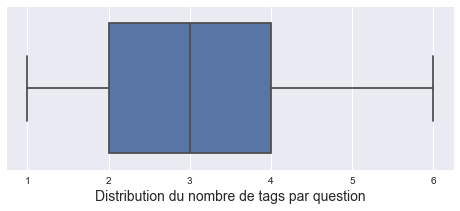

In [20]:
tags_len = tags.apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(8, 3))
ax = sns.boxplot(tags_len)
ax.set_xlabel('Distribution du nombre de tags par question', fontsize=14)

#plt.title('Nombre de tags par question', loc='bottom')

plt.show()

In [21]:
tags_freq = Counter()
for document in tags:
    tags_freq.update([w for w in document])
    
print(len(tags_freq))
tags_freq.most_common(200)

13254


[('javascript', 4928),
 ('java', 4551),
 ('c#', 4141),
 ('php', 3712),
 ('python', 3269),
 ('android', 3146),
 ('jquery', 2918),
 ('html', 2365),
 ('asp.net', 2304),
 ('c++', 1876),
 ('ios', 1776),
 ('css', 1750),
 ('mysql', 1631),
 ('sql', 1416),
 ('ruby-on-rails', 1262),
 ('.net', 1222),
 ('sql-server', 1189),
 ('objective-c', 956),
 ('c', 882),
 ('iphone', 869),
 ('arrays', 818),
 ('visual-studio', 786),
 ('json', 711),
 ('angularjs', 700),
 ('r', 653),
 ('ruby', 652),
 ('node.js', 598),
 ('xml', 583),
 ('django', 583),
 ('regex', 579),
 ('ajax', 574),
 ('database', 574),
 ('swift', 565),
 ('wpf', 503),
 ('linux', 481),
 ('excel', 481),
 ('string', 452),
 ('xcode', 431),
 ('eclipse', 428),
 ('file', 427),
 ('vb.net', 423),
 ('windows', 413),
 ('spring', 398),
 ('linq', 379),
 ('wordpress', 371),
 ('vba', 370),
 ('multithreading', 364),
 ('git', 329),
 ('html5', 316),
 ('bash', 308),
 ('winforms', 305),
 ('oracle', 297),
 ('macos', 297),
 ('image', 285),
 ('forms', 285),
 ('angular',

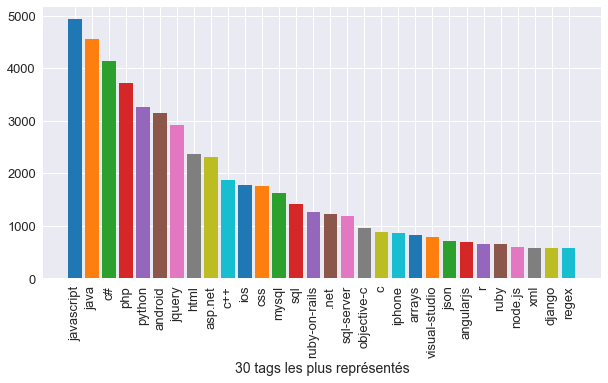

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.set_xlabel('30 tags les plus représentés', fontsize=14)
ax.bar(x=np.arange(30), 
       height=[x[1] for x in tags_freq.most_common(30)],
       tick_label=[x[0] for x in tags_freq.most_common(30)],
       color=plt.cm.get_cmap('tab10').colors)

plt.yticks(size=13)
plt.xticks(rotation='vertical', size=13)
plt.show()

In [35]:
most_common_tags = [k for k, v in tags_freq.items() if v > 150]
len(most_common_tags)

114

In [36]:
tags_new = tags.apply(lambda x: [t for t in x if t in most_common_tags])
tags_new_len = tags_new.apply(lambda x: len(x))

In [37]:
tags[tags_new_len == 0]

7                                    [kendonumerictextbox]
10                                                  [jxls]
14                                       [haskell, ffmpeg]
21                                                  [msmq]
31                                     [gitlab, gitlab-ci]
51                                        [jsf, jsf-2, el]
57                        [input, module, output, verilog]
61       [terminal, xterm, x11, terminal-emulator, xubu...
64                                   [tree, jquery-easyui]
75                                               [ndbunit]
78          [numpy, machine-learning, scipy, scikit-learn]
101                                               [joomla]
107               [docker, docker-compose, docker-machine]
111                                      [clojure, macros]
118                              [knockout.js, datatables]
124                                           [batch-file]
145                                   [information-theor

In [38]:
df_final = pd.concat([df_new, tags_new], axis=1)
df_final = df_final[tags_new_len != 0]
df_final.to_csv('data_clean.csv', index=False)